In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [5]:
def apply_harmonic_mean_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset = mask_size // 2

    for r in range(height):
        for c in range(width):
            pixel_values = []

            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if 0 <= r + x < height and 0 <= c + y < width:
                        pixel_values.append(1 / (image[r + x, c + y] + 1e-4))

            filtered_image[r, c] = int(len(pixel_values) / sum(pixel_values) + 0.5)

    return np.uint8(filtered_image)

In [6]:
# Load the grayscale image
image_path = "./Noisy PCB 455x440.tif"  # Replace with the actual path to your image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply the harmonic mean filter with a 3x3 mask
filtered_image = apply_harmonic_mean_filter(original_image, mask_size=3)



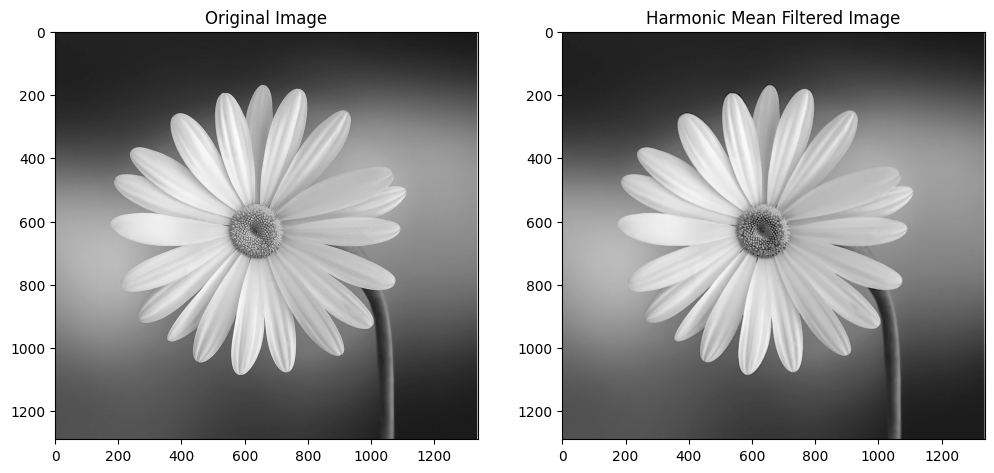

In [7]:
# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Harmonic Mean Filtered Image")

plt.show()